# 슈퍼마켓 매출을 예측하는 선형모델 비교
## 데이터 받기
- 아래 사이트에서 로그인하고 register를 선택하면 데이터 다운로드 가능
- 데이터는 인도의 슈퍼마켓의 매출 기록 샘플, 훈련데이터 8523개와 테스트 데이터 5681개를 제공함
- https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
- 훈련 데이터 사본: https://bit.ly/2HsDP2p
- 테스트 데이터 사본: https://bit.ly/2WgqtdO

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
!curl -L https://bit.ly/2HsDP2p -o Train_UWu5bXk.txt
!curl -L https://bit.ly/2WgqtdO -o Test_u94Q5KV.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   146  100   146    0     0    178      0 --:--:-- --:--:-- --:--:--   178

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  9  849k    9 80839    0     0  24888      0  0:00:34  0:00:03  0:00:31 82488
100  849k  100  849k    0     0   224k      0  0:00:03  0:00:03 --:--:--  560k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload 

In [22]:
# 슈퍼마켓 매출 데이터 읽기, 먼저 위의 사이트에 가서 등록을 하고 다운로드 받아야 함
train = pd.read_csv('Train_UWu5bXk.txt')
test = pd.read_csv('Test_u94Q5KV.txt')

In [23]:
train.shape

(8523, 12)

In [24]:
train.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


### 예측하고자 하는 목적 변수
- Item_Outlet_Sales

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 훈련 데이터 구성
- X : 입력 특성 data

#### 먼저 2개의 특성만 사용
- 매장 개장 연도(Outlet_Establishment_Year)
- 가격(Item_MRP)

In [26]:
# 데이터 나누기
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

In [27]:
# 선형회귀 모델
# 예측 특성으로 매장 개장 연도와 가격(Item_MRP) 두 개만 사용하는 경우

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales,
                                                   test_size =0.3)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

# 오차 자승의 평균, mse 계산
mse = np.mean((pred - y_test)**2)
# mse와 rmse 출력
mse, mse**(0.5)

(1990314.4086564463, 1410.78503275887)

- x_train.columns : Column 이름들
- lreg.coef_ : 선형회귀 모델의 계수들

In [28]:
coeff = DataFrame(x_train.columns)

In [29]:
coeff

,0
0,Outlet_Establishment_Year
1,Item_MRP


In [30]:
# 선형모델 계수 출력

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.633438
1,Item_MRP,15.641581


- #### 목적변수(매출)과 상품가격은 양의 비례 관계에 있는 것을 알 수 있다.
- #### 목적변수(매출)과 설립된 연도는 반비례(음의 비례 관계)하고 있는 것을 알 수 있다.

### 목적 변수와 특성간의 관계 - 산포도 그래프

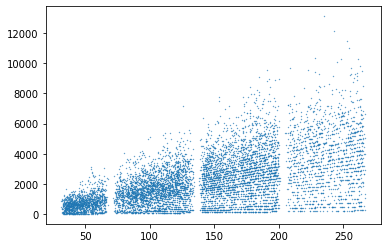

In [31]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, s=0.1)

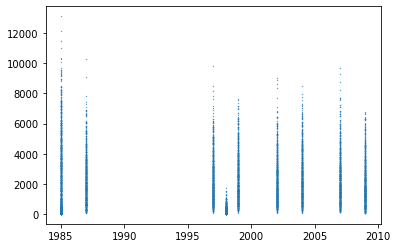

In [32]:
plt.scatter(train.Outlet_Establishment_Year, train.Item_Outlet_Sales, s=0.1)

## 회귀 성능 평가 
- #### score() : R squared 값을 반환

In [33]:
lreg.score(x_test,y_test)

0.3242020337746537

# 데이터의 모든 특성을 사용
## 전처리
- #### 각 특성 값에서 결측치가 얼마나 많은지 확인

In [34]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Item_Weight(무게) 항목에서 결측치 처리
- #### 모두 버리면 데이터의 손실이 많으므로
- #### 결측치를 평균치로 대체

In [35]:
# 무게를 평균치로 대체
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [36]:
train.Item_Visibility.value_counts().head(10)

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
Name: Item_Visibility, dtype: int64

### Item_Visibility(가시성)
- #### 결측치는 아니만 많은 데이터가 값이 0으로 되어 있다.
- #### ‘0’은 실제로는 결측치로 보고 평균치로 대체

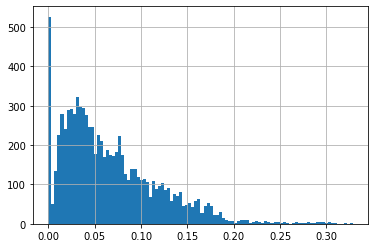

In [37]:
train.Item_Visibility.hist(bins=100)

In [38]:
# 0을 평균치로 대체
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

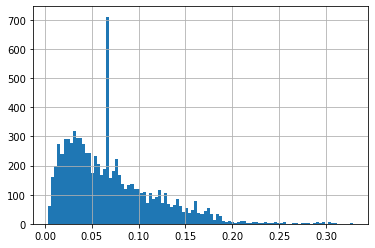

In [39]:
train.Item_Visibility.hist(bins=100)

### Outlet_Establishment_Year(설립년도) 분포

In [40]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

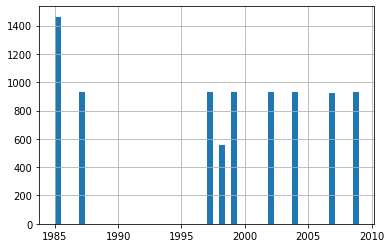

In [41]:
train.Outlet_Establishment_Year.hist(bins=50)

 ### 설립연도를 의미있는 수치로 대체
 - #### 절대값보다 설립 기간으로 대체 

In [42]:
# 연도를 설립 기간으로 대체 (의미 있는 수치로 대체))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

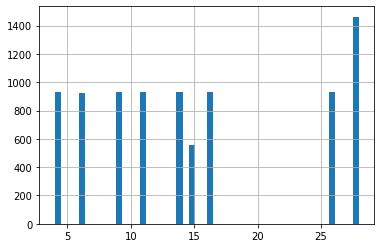

In [43]:
train.Outlet_Establishment_Year.hist(bins=50)

### Outlet_Size(매장의 크기)
- #### 결측치 많이 발생 (2,410개)

In [44]:
train.Outlet_Size.isnull().sum()

2410

In [45]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- #### 결측치가 발생한 경우 : 모두 소형매장 ‘Small“로 대체

In [46]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [47]:
train.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

### 모든 결측치 처리 확인

In [48]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 상품명(Item_Identifier)
- #### 분석하기 전에 입력 특성에서 제외해야 한다

In [49]:
# 상품명은 분석에서 제외
train.drop("Item_Identifier", axis=1, inplace=True)

### 카테고리 변수 
- #### One-hot encoding으로 변환

- pandas.DataFrame.select_dtypes(include, exclude)

In [50]:
# 카테고리 변수 인코딩
# 먼저 타입이 object인 카테고리 변수의 리스트를 만든다.
object_list = list(train.select_dtypes(include=['object']).columns)
object_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

- pd.get_dummies() : One-hot encoding

In [51]:
dummies = pd.get_dummies(train[object_list], prefix= object_list)

In [52]:
dummies

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [30]:
dummies.head().T

,0,1,2,3,4
Item_Fat_Content_LF,0,0,0,0,0
Item_Fat_Content_Low Fat,1,0,1,0,1
Item_Fat_Content_Regular,0,1,0,1,0
Item_Fat_Content_low fat,0,0,0,0,0
Item_Fat_Content_reg,0,0,0,0,0
Item_Type_Baking Goods,0,0,0,0,0
Item_Type_Breads,0,0,0,0,0
Item_Type_Breakfast,0,0,0,0,0
Item_Type_Canned,0,0,0,0,0
Item_Type_Dairy,1,0,0,0,0


- #### 원래의 열은 삭제하고 더미 변수 열을 추가한다.

In [31]:
# 원래의 열은 삭제하고 더미 변수 열을 추가한다.
X1 = train.drop(object_list, axis=1)

In [32]:
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,3735.1380
1,5.92,0.019278,48.2692,4,443.4228
2,17.50,0.016760,141.6180,14,2097.2700
3,19.20,0.066132,182.0950,15,732.3800
4,8.93,0.066132,53.8614,26,994.7052


### 목적 변수(label) 만들기

In [33]:
# 목적 변수
y = X1.Item_Outlet_Sales
X1 = X1.drop('Item_Outlet_Sales',1)

In [34]:
X1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300000,0.016047,249.8092,14
1,5.920000,0.019278,48.2692,4
2,17.500000,0.016760,141.6180,14
3,19.200000,0.066132,182.0950,15
4,8.930000,0.066132,53.8614,26
5,10.395000,0.066132,51.4008,4
6,13.650000,0.012741,57.6588,26
7,12.857645,0.127470,107.7622,28
8,16.200000,0.016687,96.9726,11
9,19.200000,0.094450,187.8214,6


In [36]:
# 스케일링을 하는 경우
# X1 = sc.fit_transform(X1)

- #### 더미 변수 열을 추가한다.

In [35]:
X = pd.concat([X1,dummies], axis =1)

In [36]:
dummies.shape, X1.shape, X.shape 

((8523, 41), (8523, 4), (8523, 45))

### 4개의 실수로 된 특성만 사용하는 경우

In [37]:
# 4개의 실수로 된 특성만 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X1,y,test_size =0.3)

lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)

mse = np.mean((pred_test - y_test)**2)

print(mse**0.5)
print(lreg.score(x_test,y_test))

1387.9151553183915
0.3459348199771224


#### (분석) 두 개의 특성만 사용한 경우의 0.32에서 성능이 약간 개선, 0.34

### 45개의 모든 특성을 사용하는 경우

In [38]:
# 45개의 모든 특성을 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.3)

lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)

mse = np.mean((pred_test - y_test)**2)

print(mse**0.5)
print(lreg.score(x_test,y_test))

1152.9420299803553
0.5486534404110446


### (분석) 45개의 모든 특성을 사용하는 경우의 성능은 0.548 로 개선

### 오차 플롯
- #### 예측 값에 대해서 각각 발생한 오차를 그려본다
    - x 축 : 예측값(pred_test)
    - y 축 : 발생 오차(pred_test - y_test)
- #### 오차의 절대값이 아니라 양수, 음수 그래도 표현했다

- #### plt.hlines() : 수평선 그리기
    - plt.hlines(y=0, xmin, xmax)
    - plt.vlines(x=1000,  ymin, ymax) : 수직선

Text(0.5, 1.0, 'Residual plot')

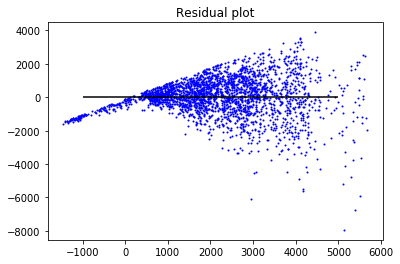

In [43]:
# residual plot - 비선형 성분이 많이 들어 있는 것을 알 수 있다.

x_plot = plt.scatter(pred_test, (pred_test - y_test), c='b', s=1)
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

### 전체 45개 특성의 계수의 크기를 나열해보면 다음과 같다. 
- #### 음과 양의 관계를 볼 수 있다.

- pd.Series(data) : index 자동 생성(0, 1...)
- pd.Series(data, index)

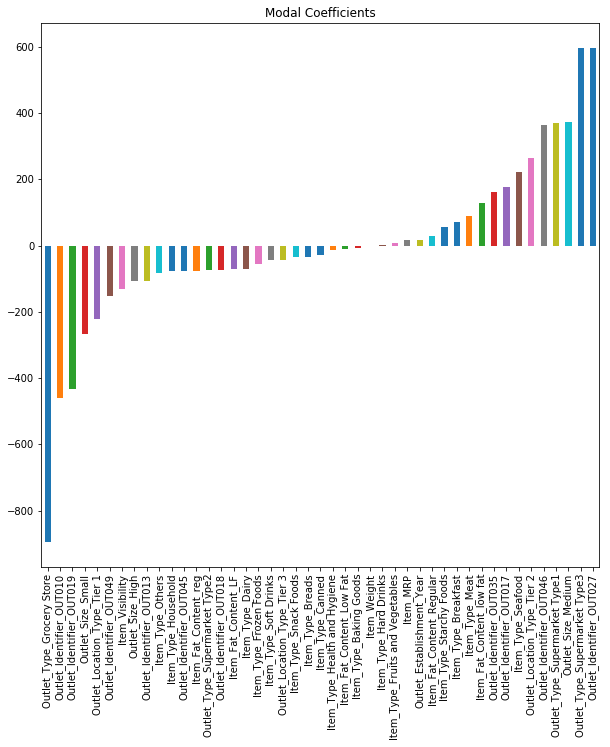

In [44]:
# checking the magnitude of coefficients
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

### 릿지(Ridge), 라쏘(Lasso) 규제 적용 - 선형 회귀 수행

- ### Ridge(alpha, normalize)
    - 손실 함수 = 에러항 + alpha * (w**2의 합)
    - alpha : Regularization strength : w 값이 줄어들게 하는 효과
    - normalize : regression 하기 전에 정규화 수행

In [50]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)

pred_test = ridgeReg.predict(x_test)

mse = np.mean((pred_test - y_test)**2)
mse**0.5, ridgeReg.score(x_test, y_test)

(1152.2780389970608, 0.5491731608147645)

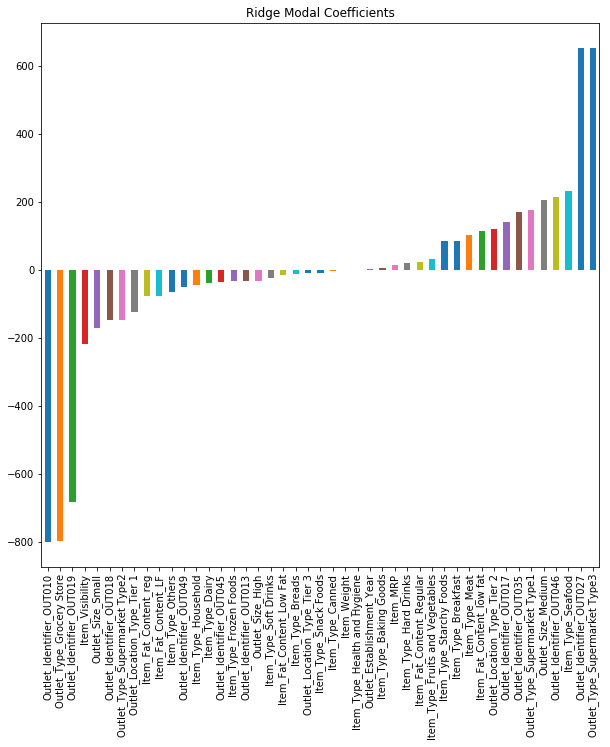

In [51]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(ridgeReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

### (분석) 큰 계수 값이 다소 줄어든 것을 볼 수 있다

In [53]:
alpha = [0.001, 0.01, 0.05, 0.5, 1]

for a in alpha:
    ridgeReg = Ridge(alpha=a, normalize=True)
    ridgeReg.fit(x_train,y_train)
    print("a=", a, "R square = ", ridgeReg.score(x_test, y_test))

a= 0.001 R square =  0.5486826382589223
a= 0.01 R square =  0.5489082444202531
a= 0.05 R square =  0.5491731608147645
a= 0.5 R square =  0.5137188639777168
a= 1 R square =  0.4592070091434418


- #### R**2 : 정확하게 잘 예측 (=1), 평균 값으로 예측 (=0)

- ### Lasso(alpha, normalize)
    - 손실 함수 = 에러항 + alpha * (w의 절대치의 합)
    - alpha : Regularization strength : 작은 w 값들을 사라지게 하는 효과
    - normalize : regression 하기 전에 정규화 수행

In [56]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(x_train,y_train)

print(lassoReg.score(x_test,y_test))

0.5493981055951233


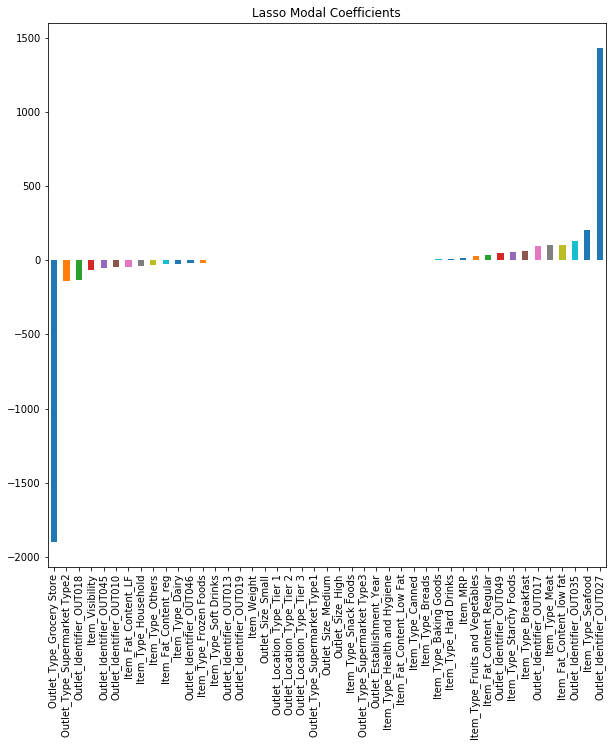

In [57]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Lasso Modal Coefficients')

### (분석) 
- #### 중요도가 적은 파라미터(계수)의 크기가 줄어든 것을 알 수 있다. 
- #### 모델의 성능은 거의 비슷하다.